In [1]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# 选择评价指标为accuracy，毕竟只有0或1
#SVM并不能直接输出各类的概率，所以在这个例子中我们用正确率作为模型预测性能的度量
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

## 读取数据 & 数据探索

In [2]:
# 读取数据
# path to where the data lies
dpath = ''
# './data/'
data = pd.read_csv(dpath +"diabetes.csv")
data.head()
data_row =len(data)

In [3]:
#train.info()

In [4]:
## 各属性的统计特性
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Glu, BloodPressure, skin, insulin bmi中有0值。从特征定义来看，0为缺少数据，且非正常含义需要进行数据补足分别尝试用mean和众数来补足

In [5]:
data.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [6]:
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

## glu使用均值。blood使用众数。skin使用均值，众数为0。Insulin使用均值，众数为0。BMI均值和众数相近，使用众数。

In [7]:
data['Glucose'] = data['Glucose'].where(data['Glucose']!=0.0, data.mean()['Glucose'])
data['BloodPressure'] = data['BloodPressure'].where(data['BloodPressure']!=0.0, data.mode()['BloodPressure'][0])
data['SkinThickness'] = data['SkinThickness'].where(data['SkinThickness']!=0.0, data.mean()['SkinThickness'])
data['Insulin'] = data['Insulin'].where(data['Insulin']!=0.0, data.mean()['Insulin'])
data['BMI'] = data['BMI'].where(data['BMI']!=0.0, data.mode()['BMI'][0])


data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.295573,26.606479,118.660163,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.106756,9.631241,93.080358,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


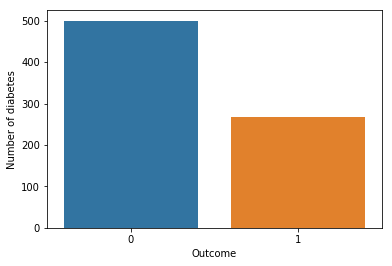

In [8]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(data.Outcome);
pyplot.xlabel('Outcome');
pyplot.ylabel('Number of diabetes');

样本数量相差不是很多

## 特征编码

In [9]:
X_train = data.drop(["Outcome"], axis=1)
y_train = data['Outcome']

## 数据预处理

In [10]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)




## 模型训练 default Logistic Regression

In [11]:
# 

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.cross_validation import cross_val_score
acc = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print('accuracy of each fold is: ',acc)
print('cv acc is:', acc.mean())

accuracy of each fold is:  [0.75324675 0.74025974 0.78571429 0.79738562 0.77124183]
cv acc is: 0.7695696460402341


E:\Users\SEELE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Grid search for LR

In [12]:
# 正则化的 Logistic Regression及参数调优
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001,0.1,1, 10,100,1000,10000,100000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [13]:
grid.cv_results_

E:\Users\SEELE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Users\SEELE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Users\SEELE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Users\SEELE\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.00079994, 0.00099998, 0.00100002, 0.0006    , 0.00079994,
        0.00079999, 0.00100007, 0.00079999, 0.00099993, 0.00119996,
        0.00100002, 0.00100002, 0.00079999, 0.00080004, 0.00160007,
        0.00079999]),
 'std_fit_time': array([3.99971008e-04, 9.53674316e-08, 1.90734863e-07, 4.89901382e-04,
        3.99971008e-04, 3.99994861e-04, 1.16800773e-07, 3.99994861e-04,
        0.00000000e+00, 4.00066376e-04, 1.16800773e-07, 6.32485093e-04,
        3.99994861e-04, 4.00018706e-04, 8.00096994e-04, 7.48353705e-04]),
 'mean_score_time': array([0.00040002, 0.        , 0.00059996, 0.00019999, 0.00039997,
        0.00019999, 0.00019999, 0.00019999, 0.00019999, 0.00020003,
        0.00019999, 0.00019999, 0.00040002, 0.00020003, 0.00019999,
        0.00040002]),
 'std_score_time': array([0.00048992, 0.        , 0.00048986, 0.00039997, 0.00048986,
        0.00039997, 0.00039997, 0.00039997, 0.00039997, 0.00040007,
        0.00039997, 0.00039997, 0.00048992, 0.000400

In [14]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.7721354166666666
{'C': 1, 'penalty': 'l1'}


c在中间，L1正则
l1, c=1

E:\Users\SEELE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Users\SEELE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


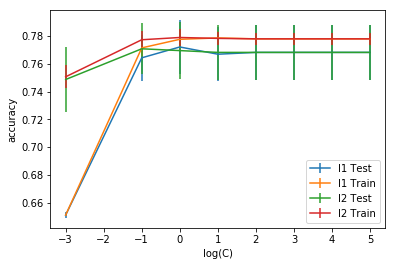

In [15]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

## LRL1正则

In [16]:
# 用LogisticRegressionCV实现正则化的 Logistic Regression
from sklearn.linear_model import LogisticRegressionCV


# 大量样本（6W+）、高维度（93），L1正则 --> 可选用saga优化求解器(0.19版本新功能)
# LogisticRegressionCV比GridSearchCV快
lrcv_L1 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='accuracy', penalty='l1', solver='liblinear', multi_class='ovr')
lrcv_L1.fit(X_train, y_train)    




LogisticRegressionCV(Cs=[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l1', random_state=None, refit=True,
           scoring='accuracy', solver='liblinear', tol=0.0001, verbose=0)

In [17]:
lrcv_L1.scores_

{1: array([[0.64935065, 0.75974026, 0.75324675, 0.75324675, 0.75324675,
         0.75324675, 0.75324675, 0.75324675],
        [0.64935065, 0.74025974, 0.74675325, 0.74025974, 0.74025974,
         0.74025974, 0.74025974, 0.74025974],
        [0.64935065, 0.77272727, 0.78571429, 0.77272727, 0.77922078,
         0.77922078, 0.77922078, 0.77922078],
        [0.65359477, 0.79084967, 0.79738562, 0.79738562, 0.79738562,
         0.79738562, 0.79738562, 0.79738562],
        [0.65359477, 0.75816993, 0.77777778, 0.77124183, 0.77124183,
         0.77124183, 0.77124183, 0.77124183]])}

In [18]:
lrcv_L1.coef_

array([[ 0.40949014,  1.14777835, -0.10817025, -0.01145812, -0.12116277,
         0.65833545,  0.28656635,  0.14298924]])

In [19]:
lrcv_L1.n_iter_

array([[[ 0,  5, 10,  9,  9, 10, 10, 11],
        [ 0,  8,  9, 10,  9,  9,  9,  9],
        [ 0,  8,  9,  9, 10,  9,  9,  9],
        [ 0,  7,  9, 10,  9, 10, 10, 10],
        [ 0, 10, 10, 10, 10,  9, 10,  9]]])

可以从迭代次数观察模型的复杂度

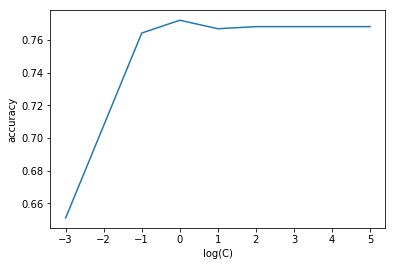

最高准确率为： 0.7721755368814192


In [20]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)

n_classes = 2
scores =  np.zeros((n_classes,n_Cs))


scores[1][:] = np.mean(lrcv_L1.scores_[1],axis = 0)

pyplot.plot(np.log10(Cs), scores[1][:].reshape(n_Cs,1)) 

pyplot.xlabel('log(C)')
pyplot.ylabel('accuracy')
pyplot.show()

print('最高准确率为：',max(scores[1][:]))

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C

C取0的时候为最优解

## LRL2正则：

In [21]:
from sklearn.linear_model import LogisticRegressionCV


# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs，为了和GridSeachCV比较，也用liblinear

lr_cv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='accuracy', penalty='l2', solver='liblinear', multi_class='ovr')
lr_cv_L2.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring='accuracy', solver='liblinear', tol=0.0001, verbose=0)

In [22]:
lr_cv_L2

LogisticRegressionCV(Cs=[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring='accuracy', solver='liblinear', tol=0.0001, verbose=0)

In [23]:
lr_cv_L2.n_iter_

array([[[4, 5, 4, 5, 5, 5, 5, 5],
        [4, 5, 5, 5, 5, 5, 5, 5],
        [4, 5, 5, 5, 5, 5, 5, 5],
        [5, 4, 5, 5, 5, 5, 5, 5],
        [5, 4, 5, 5, 5, 5, 5, 5]]])

L2正则比L1正则的迭代次数少一半

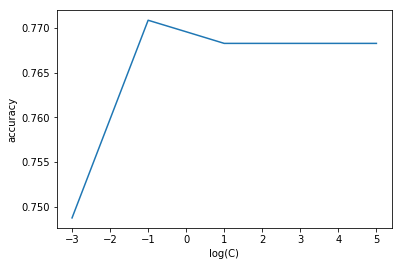

L2正则LR最高准确率为： 0.7708598590951532


In [24]:
# dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
n_classes = 2
scores =  np.zeros((n_classes,n_Cs))

scores[1][:] = np.mean(lr_cv_L2.scores_[1],axis = 0)

pyplot.plot(np.log10(Cs), scores[1][:].reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
pyplot.xlabel('log(C)')
pyplot.ylabel('accuracy')
pyplot.show()

print('L2正则LR最高准确率为：',max(scores[1][:]))

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C

C取-1的时候为最优解

## 所以综合L1和L2， L1并且C取0的时候准确率最高，为0.772,确实和gridSearch得出来的结果不一样啊。。。

### default SVC

In [25]:
#LinearSVC不能得到每类的概率，在Otto数据集要求输出每类的概率，这里只是示意SVM的使用方法
#https://xacecask2.gitbooks.io/scikit-learn-user-guide-chinese-version/content/sec1.4.html
#1.4.1.2. 得分与概率
from sklearn.svm import LinearSVC

# 训练样本6w+，交叉验证太慢，用train_test_split估计模型性能
from sklearn.model_selection import train_test_split
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, train_size = 0.8,random_state = 0)

SVC1 = LinearSVC().fit(X_train_part, y_train_part)

E:\Users\SEELE\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
#在校验集上测试，估计模型性能
y_predict = SVC1.predict(X_val)

print("Classification report for classifier %s:\n%s\n"
      % (SVC1, metrics.classification_report(y_val, y_predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_val, y_predict))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       107
          1       0.76      0.60      0.67        47

avg / total       0.81      0.82      0.81       154


Confusion matrix:
[[98  9]
 [19 28]]


结果比LR的要好。

### 线性SVM正则参数调优

线性SVM LinearSVC的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_val、y_val）来估计模型性能

In [27]:
def fit_grid_point_Linear(C, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC2 =  LinearSVC( C = C)
    SVC2 = SVC2.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC2.score(X_val, y_val)
    
    print("accuracy: {}".format(accuracy))
    print("iterations:",  SVC2.n_iter_)
    return accuracy

accuracy: 0.7987012987012987
iterations: 11
accuracy: 0.8051948051948052
iterations: 23
accuracy: 0.8116883116883117
iterations: 170
accuracy: 0.8116883116883117
iterations: 1000
accuracy: 0.8116883116883117
iterations: 1000
accuracy: 0.8376623376623377
iterations: 1000


No handles with labels found to put in legend.


accuracy: 0.7727272727272727
iterations: 1000


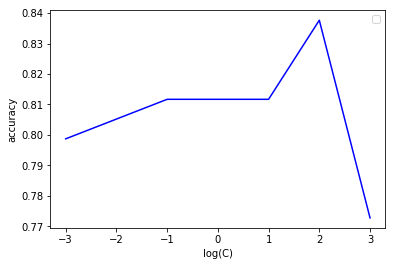

In [28]:
#需要调优的参数
C_s = np.logspace(-3, 3, 7)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份  
#penalty_s = ['l1','l2']

accuracy_s = []
for i, oneC in enumerate(C_s):
#    for j, penalty in enumerate(penalty_s):
    tmp = fit_grid_point_Linear(oneC, X_train, y_train, X_val, y_val)
    accuracy_s.append(tmp)

x_axis = np.log10(C_s)
#for j, penalty in enumerate(penalty_s):
pyplot.plot(x_axis, np.array(accuracy_s), 'b-')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )

pyplot.show()
  


线性SVM最佳参数是C = 2，最高准确率为0.837，迭代次数1000，很高了。随着C值的提升，模型复杂度在提升。

### RBF核SVM正则参数调优

RBF核是SVM最常用的核函数。
RBF核SVM 的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和核函数的宽度gamma
C越小，决策边界越平滑； 
gamma越小，决策边界越平滑。

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_val、y_val）来估计模型性能

In [29]:
from sklearn.svm import SVC

In [30]:
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC3.score(X_val, y_val)
    
    print("accuracy: {}".format(accuracy))
    print("support_vectors_ :", SVC3.support_vectors_ )
    return accuracy

In [31]:
#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-2, 2, 5)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_val, y_val)
        accuracy_s.append(tmp)



accuracy: 0.6948051948051948
support_vectors_ : [[ 1.82781311 -0.21967262 -0.18973447 ...  0.41466084 -1.02042653
  -0.36084741]
 [ 0.04601433 -0.38405874  1.62861696 ...  0.74940647 -0.84827977
  -0.27575966]
 [ 1.82781311  0.56938074  0.63678891 ... -0.77878009  2.92686858
   2.02160968]
 ...
 [ 0.63994726  2.24611912  1.62861696 ...  0.44376915 -0.58552944
   2.78739945]
 [ 1.53084665  1.58857465  0.14087488 ...  1.68087256 -0.20801461
   0.83038113]
 [-0.84488505  0.14197684 -1.01625784 ... -0.34215536 -0.37110101
   1.17073215]]
accuracy: 0.6948051948051948
support_vectors_ : [[ 1.82781311 -0.21967262 -0.18973447 ...  0.41466084 -1.02042653
  -0.36084741]
 [ 0.04601433 -0.38405874  1.62861696 ...  0.74940647 -0.84827977
  -0.27575966]
 [ 1.82781311  0.56938074  0.63678891 ... -0.77878009  2.92686858
   2.02160968]
 ...
 [ 0.63994726  2.24611912  1.62861696 ...  0.44376915 -0.58552944
   2.78739945]
 [ 1.53084665  1.58857465  0.14087488 ...  1.68087256 -0.20801461
   0.83038113]
 [

accuracy: 1.0
support_vectors_ : [[-0.84488505 -1.20598931 -0.52034382 ... -0.85155088 -0.36506078
  -0.19067191]
 [-0.84488505 -1.07448042 -0.52034382 ... -0.63323851 -0.92076261
  -1.04154944]
 [ 0.3429808  -0.1867954   0.14087488 ... -0.99709246 -0.81807858
  -0.27575966]
 ...
 [ 0.63994726  2.24611912  1.62861696 ...  0.44376915 -0.58552944
   2.78739945]
 [ 1.53084665  1.58857465  0.14087488 ...  1.68087256 -0.20801461
   0.83038113]
 [-0.84488505  0.14197684 -1.01625784 ... -0.34215536 -0.37110101
   1.17073215]]
accuracy: 1.0
support_vectors_ : [[-0.84488505 -1.20598931 -0.52034382 ... -0.85155088 -0.36506078
  -0.19067191]
 [-0.84488505 -1.07448042 -0.52034382 ... -0.63323851 -0.92076261
  -1.04154944]
 [ 0.3429808  -0.1867954   0.14087488 ... -0.99709246 -0.81807858
  -0.27575966]
 ...
 [ 0.63994726  2.24611912  1.62861696 ...  0.44376915 -0.58552944
   2.78739945]
 [ 1.53084665  1.58857465  0.14087488 ...  1.68087256 -0.20801461
   0.83038113]
 [-0.84488505  0.14197684 -1.016

从上述部分运行结果来看，出现了准确率为1的情况，参数不错。但是参数里没有迭代次数，不知道应该从哪个参数观察模型复杂度

[-2. -1.  0.  1.  2.] ^^^^ [0.69480519 0.74675325 0.80519481 0.81168831 0.81818182] ^^^^ 0.01
[-2. -1.  0.  1.  2.] ^^^^ [0.69480519 0.82467532 0.86363636 0.91558442 0.94155844] ^^^^ 0.1
[-2. -1.  0.  1.  2.] ^^^^ [0.69480519 0.69480519 0.98701299 1.         1.        ] ^^^^ 1.0
[-2. -1.  0.  1.  2.] ^^^^ [0.69480519 0.69480519 1.         1.         1.        ] ^^^^ 10.0
[-2. -1.  0.  1.  2.] ^^^^ [0.69480519 0.69480519 1.         1.         1.        ] ^^^^ 100.0


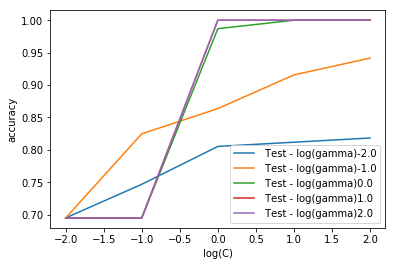

In [32]:
accuracy_s1 =np.array(accuracy_s).reshape(len(C_s),len(gamma_s))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    pyplot.plot(x_axis, np.array(accuracy_s1[:,j]), label = ' Test - log(gamma)' + str(np.log10(gamma)))
    print(x_axis,'^^^^', np.array(accuracy_s1[:,j]),'^^^^', gamma)

pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('RBF_SVM_Otto.png' )

pyplot.show()

## gamma为1.0/10/100的时候，均有C值使准确率为1。取准确率1时gamma的最小值1，然后C取1得最优解

整体来看，SVM的复杂度最高，然后是svc，LR的复杂度相对低很多，但是准确率不高。RBF核的SVM准确率可以达到1